# GEOGRAPHIC VISUALIZATIONS

## This script contains the following:
### 1. Importing data and libraries
### 2. Data cleaning
### 3. Data wrangling
### 4. Plotting a Chloropleth

## 1. Importing Data Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# prompt matplotlib visuals to appear in Notebook
%matplotlib inline

In [55]:
# import json file
canada_geo = r'C:\Users\user\Waiting times for priority procedures\1.Data\Original data\canada_provinces.geo.json'

In [56]:
canada_geo

# add georef-canada-province file to the path.... added.....i think this is a different file. ok, let me see

'C:\\Users\\user\\Waiting times for priority procedures\\1.Data\\Original data\\canada_provinces.geo.json'

In [62]:
import json

f = open(canada_geo)

data = json.load(f)

for i in data['features']:
    print(i['properties']['name'])
    
#'prov_name_en'  

British Columbia
Newfoundland and Labrador
Saskatchewan
Quebec
Alberta
Manitoba
Nova Scotia
Ontario
New Brunswick
Prince Edward Island
Yukon


In [ ]:
#wait a bit please

In [63]:
# Defining the path for the data file
path = r'C:\Users\user\Waiting times for priority procedures\1.Data'

In [64]:
# importing datasets: 
# the entire dataset
df_states = pd.read_csv(os.path.join(path,'Prepared data','wait_time_Transformed.csv'))

In [65]:
# the benchmarked procedure dataset
df_bm= pd.read_csv(os.path.join(path,'prepared data','wait_time_benchmarked.csv'))

## 2. Data Wrangling

In [66]:
#checking the df_states dataset
df_states.head()

,state,medical_procedure,year,%meeting_benchmark,50th_percentile_days,90th_percentile_days,total_cases
0,Alberta,Bladder Cancer Surgery,2013,NA,28,57,477
1,Alberta,Bladder Cancer Surgery,2014,NA,29,64,488
2,Alberta,Bladder Cancer Surgery,2015,NA,28,70,542
3,Alberta,Bladder Cancer Surgery,2016,NA,30,70,448
4,Alberta,Bladder Cancer Surgery,2017,NA,30,69,573


In [67]:
# changing column heads with more understandable names
df_states.rename(columns = {'50th_percentile_days':'median_days','90th_percentile_days':'maximum_days'},inplace=True)
df_bm.rename(columns = {'50th_percentile_days':'median_days','90th_percentile_days':'maximum_days'},inplace=True)

In [68]:
#checking column heads
df_states.head()

,state,medical_procedure,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,Alberta,Bladder Cancer Surgery,2013,NA,28,57,477
1,Alberta,Bladder Cancer Surgery,2014,NA,29,64,488
2,Alberta,Bladder Cancer Surgery,2015,NA,28,70,542
3,Alberta,Bladder Cancer Surgery,2016,NA,30,70,448
4,Alberta,Bladder Cancer Surgery,2017,NA,30,69,573


In [69]:
df_bm.head()

,state,medical_procedure,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,Alberta,CABG,2008,99.0,7,83,511
1,Alberta,CABG,2009,93.0,17,156,665
2,Alberta,CABG,2010,95.0,15,133,590
3,Alberta,CABG,2011,95.0,15,134,369
4,Alberta,Cataract Surgery,2008,71.0,70,199,8662


In [70]:
#checking for null values
df_states.shape

(1487, 7)

In [71]:
type(df_states['state'])

pandas.core.series.Series

In [72]:
type(df_states)

pandas.core.frame.DataFrame

In [73]:
df_states.isnull().sum()

state                 0
medical_procedure     0
year                  0
%meeting_benchmark    0
median_days           0
maximum_days          0
total_cases           0
dtype: int64

In [74]:
#NO NULL VALUES. WE HAVE ALREADY CLEANED THE DATASET IN THE PREVIOUS TASK6.2

In [75]:
# CHECKING FOR df_bm
df_bm.shape

(781, 7)

In [76]:
df_bm.isnull().sum()  # checking for missing values

state                 0
medical_procedure     0
year                  0
%meeting_benchmark    0
median_days           0
maximum_days          0
total_cases           0
dtype: int64

##checking duplicates

In [77]:
df_dups = df_states[df_states.duplicated()]

In [78]:
df_dups.shape #no duplicates

(0, 7)

In [79]:
df_dups2 = df_bm[df_bm.duplicated()]

In [21]:
df_dups2.shape #no duplicates

(0, 7)

## Data Cleaning

<AxesSubplot:xlabel='median_days', ylabel='Count'>

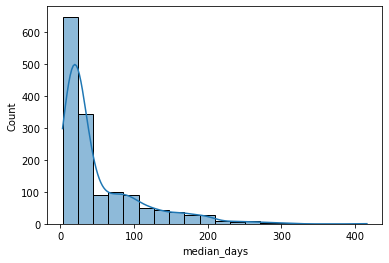

In [13]:
#Extreme value checks
sns.histplot(df_states['median_days'], bins=20, kde = True) # shows extreme values for 'median_days'

All values are in normal limits

<AxesSubplot:xlabel='maximum_days', ylabel='Count'>

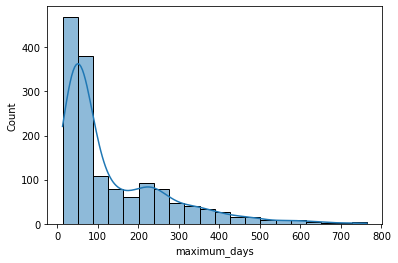

In [25]:
sns.histplot(df_states['maximum_days'],bins = 20, kde = True)

## 4. Plotting chloropleths

### 1. For all recorded procedures

In [80]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df_states[['state','median_days']]
data_to_plot.head()

,state,median_days
0,Alberta,28
1,Alberta,29
2,Alberta,28
3,Alberta,30
4,Alberta,30


In [81]:
data_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        1487 non-null   object
 1   median_days  1487 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [84]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = canada_geo, 
    data = data_to_plot,
    columns = ['state', 'median_days'],
    key_on = 'FEATURES.PROPERTIES.NAME', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "median_waiting_days").add_to(map)
folium.LayerControl().add_to(map)

map



AttributeError: 'NoneType' object has no attribute 'get'

In [24]:
map

In [ ]:
## :((( I am tired :). Can you also make some search and see why this error happens, I have met this error before, but do not remrember how I 
solved :( 
    
   #I am also working on i for the last 3 days. Tired finally I started the task6.4 because I have to finish the course. is there any other way out
# because 22nd july is the last day of the course..
    # Tableau is very good as compared to python as far as maps are concerned. your comments :)
    
#yes, folium is a bit error - changes per computer. I suggest you to continue with your next tasks and also ask abut this in 
    #the slack channel, maybe recenly someone has had same 'get' problem as in our case. I will also make a search. I think time will
    #help to find a solution. 
    
    #ok? 
    
    # sure, shall I submit this task as it is and move forwards. and in the mean time I shall look for the solution.
    
    #no need to submit this one, continue with others, you can submit as soon as we have a solution. 
    #ok. Fine. what if it is not submitted before the last date i.e 22 july as it is showing on my portal. 
    
    # do not worry, we will find solution by then. 
    
    # That would be great. 
    # send me the last json , jupyter notebook and your dataset via message bar. 
    
    # sure i will
    
    # i am leaving now. I 
    et you know
    
    # thank you for your help. you took a lot of effort. thanks a lot.:)
    
    #wlcone :) , thanks